In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import pandas as pd
import scipy.special as SS
import scipy.stats as SSA
import copy
import random
import math
from numba import njit

In [12]:
WN = np.loadtxt('W_avg.csv')
Cave = np.loadtxt('Cave.csv')
pop = np.loadtxt('pop_new.csv')

In [13]:
num_fips = len(pop)
T = 60
num_ens = 300
Z = 3 # latent period
Zb = 1 # scale parameter for Z
D = 5 # infectious period
Db = 1 # scale parameter for b
alpha = 0.1 # reporting rate 10%

In [15]:
# seeding
l0 = 1859-1 # start with New York County NY in python -1, in matlab is 1859
i0 = 100 ## the starting t=0, in matlab it is 1
initials = (l0,i0)

In [16]:
x_cutoff = 100
r = 0.1 ## parameters (in the paper of Lloyd smith is the k)
R0 = 2.5  ## the model input

p = r/(R0+r)

weights = np.zeros(x_cutoff)
for i in range(x_cutoff):
    temp1=SS.gamma(r+i)/SS.gamma(r)/SS.gamma((i+1))*np.power(p,r)*np.power((1-p),i)
    weights[i] = temp1

In [17]:
print('it covers', np.sum(weights)*100,'% of the values') ## to generate the sample, the sum up probe should be 1
## we can assign/compare the rest of prob to each one
prob_res = (1- np.sum(weights))/x_cutoff
print (prob_res, 'compare with the last prob', weights[-1])
## normalise the weights to 1
weights_n = weights/np.sum(weights)

it covers 100.0 % of the values
0.0 compare with the last prob 3.3891205435755526e-42


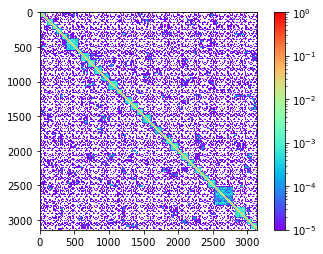

In [176]:
from matplotlib import pyplot as plt, cm
from matplotlib import colors

im = plt.imshow(WN, cmap=cm.rainbow, norm=colors.LogNorm(vmin=0.00001, vmax=1))
plt.colorbar(im)
plt.show()  ### this is scattered

In [185]:
import networkx as nx
# G = nx.from_numpy_array(WN)
D = np.zeros_like(WN)
np.fill_diagonal(D, np.diag(WN))

In [187]:
L = D - WN

In [189]:
w, v = np.linalg.eig(L)

In [206]:
v[:,24]

array([ 1.03425005e-16+0.j, -4.46421337e-17+0.j, -2.94326437e-17+0.j, ...,
        0.00000000e+00+0.j,  6.75027502e-38+0.j,  0.00000000e+00+0.j])

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


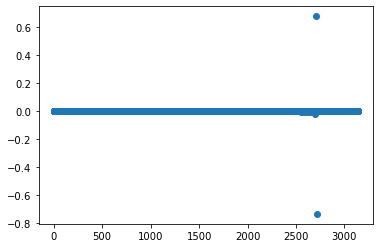

In [201]:
plt.scatter(range(3142),v[:,24])

In [197]:
np.where(w == max(w))[0]

array([24])

In [170]:
# compute wji make the transission rate(probability)
# mobility factor
theta = 1
W = np.zeros_like(Cave)
WN = np.zeros_like(Cave)
idx = list(range(num_fips))
for i in range(num_fips):
    non_dia = np.delete(idx, i)
    W[non_dia,i] = Cave[non_dia,i]/pop[i] 
    W[i,i] = max((1-np.sum(W[non_dia,i])),0.2) ## the maxium probability travel within is 0.2
    WN[:,i] = W[:,i]/np.sum(W[:,i]) ## normalise distribution

In [171]:
WR = np.zeros_like(Cave)
for i in range(num_fips):
    non_dia = np.delete(idx, i)
    dig = WN[i,i]
    WR[i,i] = dig
    WR[non_dia,i] = (1-dig)/(num_fips-1)

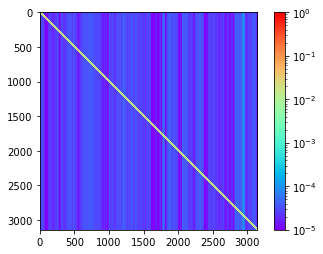

In [177]:
# from matplotlib import pyplot as plt, cm
# from matplotlib import colors

im = plt.imshow(WR, cmap=cm.rainbow, norm=colors.LogNorm(vmin=0.00001, vmax=1))
plt.colorbar(im)
plt.show() ### it will have equal probability from i to the other places j != i, the prob to stay remains the same

In [178]:
np.savetxt('W_rand.csv',WR)